In [1]:
import xarray as xr
from thesis_toolbox.utils import calc_spatial_correlations
from thesis_toolbox.plot.tools import map_large_scale
from thesis_toolbox.plot.plot_correlation_map import plot_large_scale_correlation_map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from functools import partial
%matplotlib inline

In [9]:
path = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/downloads/'

ds = xr.open_dataset(path+'intermediate_results/era5.single_level.soil_temperature_level_1.MAM.1979-2019.nc')
df = pd.read_csv('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/timeseries_table.csv', index_col=0)

da = xr.DataArray(df['AO EOF DJF'],dims='time')

ds = ds.sel(time=slice('1999',None))

ds = ds.assign_coords(time=da.time)

r, p = calc_spatial_correlations(ds['stl1'].coarsen(longitude=4,latitude=2, boundary='pad').mean(), da)

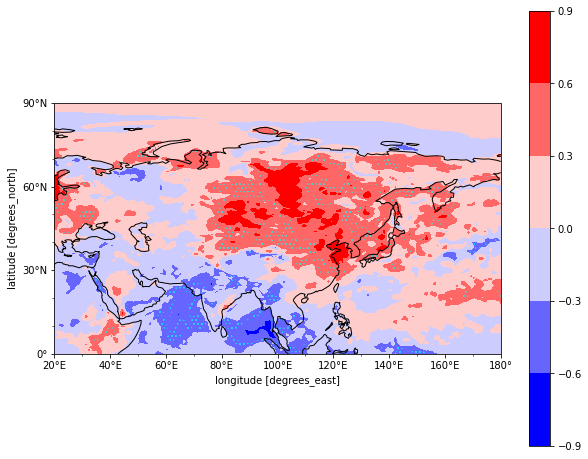

In [10]:
plot_large_scale_correlation_map(r,p_vals=p, contourf=True)

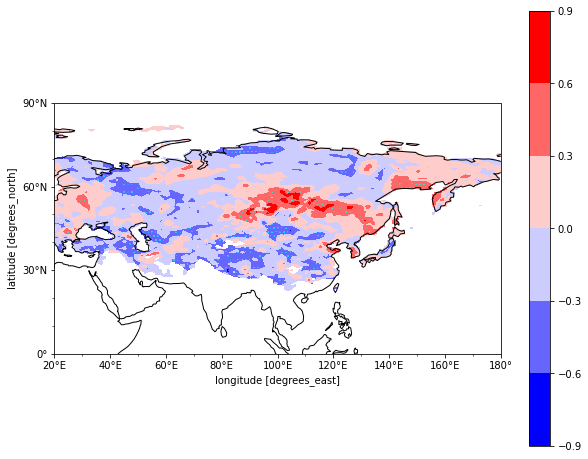

In [11]:
da = xr.DataArray(df['Emissions total'],dims='time')
r, p = calc_spatial_correlations(ds['sd'].coarsen(longitude=4,latitude=2, boundary='pad').mean(), da)
plot_large_scale_correlation_map(r,p_vals=p,contourf=True)